In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1132 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0439 - accuracy: 0.9862
313/313 - 0s - loss: 0.0767 - accuracy: 0.9780


[0.07669153809547424, 0.9779999852180481]

In [6]:
def backprop_dense(activation, weight, bias, relevance):

  w = tf.maximum(0., weight)
  b = tf.maximum(0., bias)
  z = tf.matmul(activation, w) + b #현재층의 activation

  # 다음층의 타당성 / 현재층의 actvation
  s = relevance / z

  c = tf.matmul(s, tf.transpose(w))

  return activation * c

In [7]:
def getLRP(img):
  activations = []
  prev_activation = img.reshape(-1, 784)
  for layer in model.layers:
    prev_activation = layer(prev_activation)
    activations.append(prev_activation)
  
  R = activations[2]

  a = activations[1]
  w = model.layers[2].kernel
  b = model.layers[2].bias

  R = backprop_dense(a, w, b, R)


  a = activations[0]
  w = model.layers[1].kernel
  b = model.layers[1].bias

  R = backprop_dense(a, w, b, R)
  return R


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



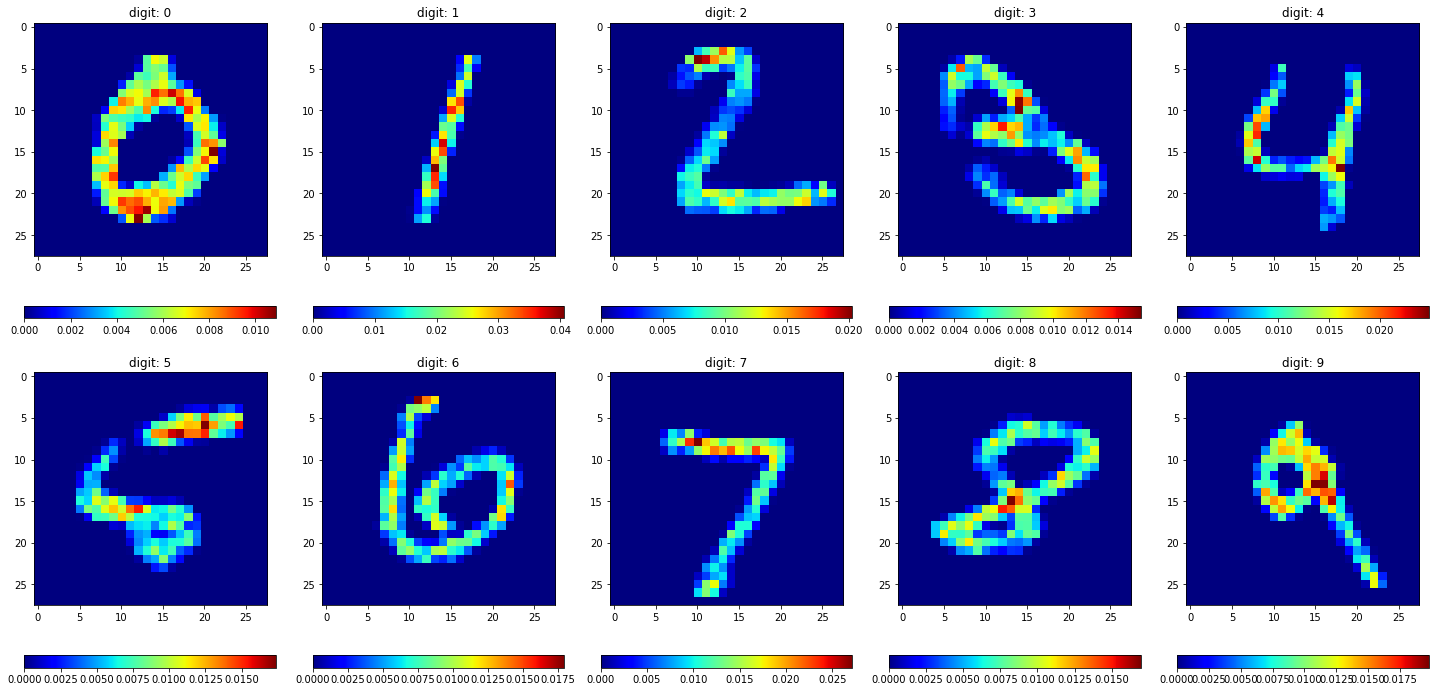

In [8]:
import numpy as np
import math
# get MNIST dataset index dict
mnist_dict = {}
idx = 0
for label in y_test:
  if mnist_dict.get(label):
    mnist_dict[label].append(idx)
  else:
    mnist_dict[label] = [idx]
  idx += 1

# get LRP
nums = []
for i in range(10):
  img_idx = mnist_dict[i][0]
  img = x_test[img_idx]
  lrp = getLRP(img)
  nums.append(lrp)

# plot images
plt.figure(figsize=(20,10))
for i in range(2):
  for j in range(5):
    idx = 5 * i + j
    plt.subplot(2, 5, idx + 1)
    plt.title('digit: {}'.format(idx))

    result = tf.reshape(nums[idx], [28, 28])
    result = result.numpy()
    # result = np.nan_to_num(result)

    plt.imshow(result, cmap=plt.cm.jet)
    plt.colorbar(orientation='horizontal')
plt.tight_layout()